In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import NearestCentroid

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.datasets import load_wine

from random import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [2]:
def sigmoid(z, prime=False):
   if prime:
      return z * (1 - z)
   return 1 / (1 + np.exp(-z))

In [3]:
def tanh(z, prime=False):
   if prime:
      return 1 - z ** 2
   return np.tanh(z)

In [4]:
def relu(z, prime=False):
   if prime:
      if z <= 0:
            return 0
      else:
            return 1
   return np.maximum(0, z)

In [5]:
def leaky_relu(z, prime=False):
   epsilon = 0.1 # epsilon should be much smaller
   if prime:
      if z <= 0:
            return -epsilon
      else:
            return 1
   return np.maximum(z * epsilon, z)

In [6]:
X = np.array([[0,0], [0,1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [7]:
mlpc = MLPClassifier(max_iter=5000)
mlpc.fit(X, y)

mlpc.predict(X)

array([0, 1, 1, 0])

In [8]:
h = mlpc.predict(X)

In [9]:
h

array([0, 1, 1, 0])

In [10]:
#Assignment 12
#Nearest neighbor - NOT WORKING
n_clf = NearestCentroid()
n_clf.fit(X, y)

NearestCentroid()

In [11]:
print(n_clf.predict(X))

[0 0 0 0]


In [12]:
#SGD - NOT WORKING
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [13]:
sgd_clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
sgd_clf.fit(X, y)
print(sgd_clf.predict(X))

[1 1 1 1]


C:\Users\Jeppe N. Dyekjær\Documents\4.Softwareudvikling_KEA\6. Semester\Git_Projekter\AI_Tasks\jupyter_work_tasks\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [14]:
 #SVC - WORKING
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [15]:
print(svc_clf.predict(X))

[0 1 1 0]


In [16]:
#Wine data
wine_df= pd.DataFrame(load_wine().data, columns=load_wine().feature_names)

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


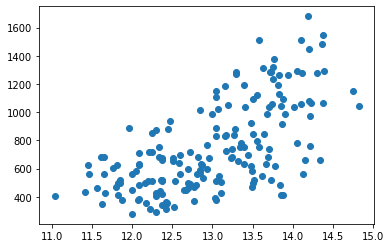

In [17]:
x_alcohol = wine_df["alcohol"]
y_proline = wine_df["proline"]
plt.scatter(x_alcohol, y_proline)

In [35]:
mlpc_wine = MLPClassifier(max_iter=100)
x_alcohol_shape = x_alcohol.to_numpy().reshape(-1, 1)
y_proline_shape = y_proline.to_numpy()

mlpc_wine.fit(x_alcohol_shape, y_proline_shape)
mlpc_wine.predict(x_alcohol_shape)

array([520., 680., 680., 520., 680., 520., 520., 520., 520., 520., 520.,
       520., 520., 520., 520., 680., 520., 520., 520., 680., 520., 680.,
       680., 680., 680., 680., 680., 680., 520., 520., 520., 680., 680.,
       520., 680., 680., 680., 680., 680., 520., 680., 680., 520., 680.,
       680., 520., 520., 520., 520., 520., 680., 520., 520., 520., 520.,
       680., 520., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 520., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 520., 680., 680., 680., 68

In [19]:
def evaluate(H, Y, beta=1.0):
   tp = sum((Y == H) * (Y == 1) * 1)
   tn = sum((Y == H) * (Y == 0) * 1)
   fp = sum((Y != H) * (Y == 0) * 1)
   fn = sum((Y != H) * (Y == 1) * 1)

   accuracy = (tp + tn) / (tp + fp + fn + tn)
   sensitivity = tp / (tp + fn)
   specificity = tn / (fp + tn)
   precision = tp / (tp + fp)
   recall = sensitivity
   f_score = ( (beta**2 + 1) * precision * recall) / (beta**2 * precision + recall)
   auc = (sensitivity + specificity) / 2
   youden = sensitivity - (1 - specificity)
   p_plus = sensitivity / (1 - specificity)
   p_minus = (1 - sensitivity) / specificity
   dp = (np.sqrt(3) / np.pi) * (np.log(sensitivity/(1 - sensitivity) + np.log(specificity/(1 - specificity))))

   result = {}
   result["tp"] = tp
   result["tn"] = tn
   result["fp"] = fp
   result["fn"] = fn
   result["accuracy"] = accuracy
   result["sensitivity"] = sensitivity
   result["specificity"] = specificity
   result["precision"] = precision
   result["recall"] = recall
   result["f-score"] = f_score
   result["AUC"] = auc
   result["Youden"] = youden
   result["p+"] = p_plus
   result["p-"] = p_minus
   result["DP"] = dp

   return result

In [36]:
H = [520., 680., 680., 520., 680., 520., 520., 520., 520., 520., 520.,
       520., 520., 520., 520., 680., 520., 520., 520., 680., 520., 680.,
       680., 680., 680., 680., 680., 680., 520., 520., 520., 680., 680.,
       520., 680., 680., 680., 680., 680., 520., 680., 680., 520., 680.,
       680., 520., 520., 520., 520., 520., 680., 520., 520., 520., 520.,
       680., 520., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 520., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 520., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 520., 680., 520., 680., 680., 680., 680., 680., 520.,
       520., 680., 680., 680., 680., 680., 680., 520., 680., 680., 680.,
       680., 520.]

In [43]:
#Assignment 15
X_2 = np.array([[0,1], [0,2], [3, 1], [1, 1], [2, 1], [2,1], [3,2], [1,2], [2,2]])
y_2 = np.array([0, 2, 2, 0, 4, 2, 1, 2, 3])

mlpc = MLPClassifier(max_iter=5000)
mlpc.fit(X_2, y_2)

h_2 = mlpc.predict(X_2)
h_2

array([0, 2, 2, 0, 2, 2, 1, 2, 3])

In [44]:
evaluate(h_2, y_2)

C:\Users\JEPPEN~1.DYE\AppData\Local\Temp/ipykernel_6268/1143329567.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  p_plus = sensitivity / (1 - specificity)
C:\Users\JEPPEN~1.DYE\AppData\Local\Temp/ipykernel_6268/1143329567.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  dp = (np.sqrt(3) / np.pi) * (np.log(sensitivity/(1 - sensitivity) + np.log(specificity/(1 - specificity))))


{'tp': 1,
 'tn': 2,
 'fp': 0,
 'fn': 0,
 'accuracy': 1.0,
 'sensitivity': 1.0,
 'specificity': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f-score': 1.0,
 'AUC': 1.0,
 'Youden': 1.0,
 'p+': inf,
 'p-': 0.0,
 'DP': inf}

In [20]:
#MNIST
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [21]:
mnist = fetch_openml('mnist_784', data_home='~/datasets/mnist')

In [22]:
# check dataset: 70,000 samples, 784 features
mnist.data.shape

(70000, 784)

In [23]:
Z = np.c_[mnist.target, mnist.data]
Z[:,0]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [24]:
# split data and labels into X and Y
X = Z[:,1:]
Y = Z[:,0]

4


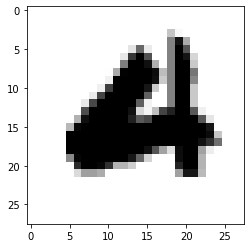

In [25]:
idx = 1030
X = np.asarray(X, dtype=int)
print(Y[idx])
img = plt.imshow(X[idx].reshape(28,28), cmap='gray_r')

In [26]:
# training set
X_train = X[0:50000]
Y_train = Y[0:50000]

# validation set
X_val = X[50000:60000]
Y_val = Y[50000:60000]

# test set
X_test = X[60000:70000]
Y_test = Y[60000:70000]

In [27]:
X_train.shape

(50000, 784)

In [28]:
classifier_names = [
    "Decision Tree",
    "Random Forest", 
    "Neural Net (75, 75)", 
    "Neural Net (784, 784, 784)", 
    "Naive Bayes"
]

In [29]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(hidden_layer_sizes=(75, 75)),
    MLPClassifier(hidden_layer_sizes=(784, 784, 784)),
    GaussianNB(),
]

In [30]:
for clf, clf_name in zip(classifiers, classifier_names):
    print(f"** {clf_name}")
    t0 = time.time()
    clf.fit(X_train, Y_train)
    t1 = time.time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = clf.score(X_train[0:10000], Y_train[0:10000])
    t2 = time.time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = clf.score(X_test, Y_test)
    t3 = time.time()
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tScore Train: {score_train:.3f}\tScore Test: {score_test:.3f}")

** Decision Tree
	Training time:		17.881
	Prediction time(train):	0.036
	Prediction time(test):	0.067
	Score Train: 1.000	Score Test: 0.872
** Random Forest
	Training time:		39.035
	Prediction time(train):	0.429
	Prediction time(test):	0.420
	Score Train: 1.000	Score Test: 0.969
** Neural Net (75, 75)
	Training time:		173.345
	Prediction time(train):	0.084
	Prediction time(test):	0.101
	Score Train: 0.997	Score Test: 0.966
** Neural Net (784, 784, 784)
	Training time:		979.981
	Prediction time(train):	0.507
	Prediction time(test):	0.508
	Score Train: 0.993	Score Test: 0.975
** Naive Bayes
	Training time:		0.757
	Prediction time(train):	0.706
	Prediction time(test):	0.709
	Score Train: 0.567	Score Test: 0.554


In [32]:
# default alpha=0.0001
for a in [0.0001, 0.001, 0.01, 0.1, 1]:
    mlp = MLPClassifier(hidden_layer_sizes=(75, 75), alpha=a)
    t0 = time.time()
    mlp.fit(X_train, Y_train)
    t1 = time.time()
    print(mlp.score(X_test, Y_test), t1 - t0)

0.9625 141.952383518219
0.9695 252.95587944984436
0.967 132.2775843143463
0.9669 150.39331102371216
0.9678 117.19650554656982


In [33]:
for hl in [(25), (50), (50, 50), (100), (100, 100)]:
    mlp = MLPClassifier(hidden_layer_sizes=hl)
    t0 = time.time()
    mlp.fit(X_train, Y_train)
    t1 = time.time()
    print(mlp.score(X_test, Y_test), t1 - t0)

0.9259 309.69778084754944
0.9488 189.69403886795044
0.9584 222.86079931259155
0.9659 226.65382289886475
0.9675 3181.3669922351837
